## Descrição do Projeto 

O objetivo do projeto é identificar padrões nas informações disponíveis, compreender as preferências dos passageiros e analisar o impacto de fatores externos nas corridas. Para alcançar isso, utilizaremos um banco de dados, faremos análises dos dados dos concorrentes e testaremos uma hipótese relacionada ao efeito do clima na frequência das viagens.

Com essas informações em mãos, será possível fornecer visibilidade à empresa, permitindo a criação de propagandas de marketing mais eficazes e direcionadas para o negócio.

A seguir, apresentamos os dados disponíveis para realizar este estudo. Essa etapa é de extrema importância, pois envolve a compreensão da base de dados, correções, enriquecimento de dados e aplicação de normalizações e transformações que contribuirão para facilitar e tornar mais precisa a análise do negócio.

### Descrição dos Dados

##### tabela empresas taxi: dados sobre as empresas de taxi 
- company_name: nome da empresa
- trips_amount: quantidade de viagens
##### tabela localização: dados sobre bairros da cidade de chicago
- dropoff_location_name: nome do bairro
- average_trips: média das viagens
###### tabela weather_records: dados sobre o clima
- start_ts: grava data e hora (tempo arredondado para a hora)
- weather_conditions: informa as condições do tempo
- duration_seconds: informa as condições do tempo, informação meterológica

### Importe de Bibliotecas  📚

In [1]:
# importe de bibliotecas necessárias para análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import datetime as dt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

### Importe de Dados

In [2]:
# leitura das primeiras linhas do dataframe
dados01 = pd.read_csv('data/moved_project_sql_result_01.csv')
dados01.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
# leitura das informações do dataframe (tipo de dados,campos ausentes,quantidade de dados geral e por campo)
dados01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
# utilizando a função describe(), para dar visibildiade as principais métricas descritivas
dados01.describe().T.drop("count", axis=1).style.format().background_gradient(subset=['mean', 'std','min','25%','50%','75%','max'], cmap='Accent')

,mean,std,min,25%,50%,75%,max
trips_amount,2145.484375,3812.310186,2.000000,20.750000,178.500000,2106.500000,19558.000000


Após a leitura dos dados iniciais, foi observado que o dataframe não possui valores ausentes. Além disso, os tipos de dados estão corretamente formatados para a realização das análises. Ao utilizar a função describe(), foi possível verificar as estatísticas descritivas do dataframe.

Uma observação importante é que o dataframe apresenta um desvio padrão alto em geral. Essa informação pode ser percebida ao analisar a média e a mediana dos dados. Essa variação é esperada, uma vez que o estudo está relacionado ao tempo de viagens, que podem variar desde trajetos curtos até trajetos longos.

Portanto, o comportamento do dataframe em relação ao desvio padrão elevado é coerente com a natureza das viagens, que abrangem diferentes durações, incluindo trajetos curtos, médios e longos.

### Realizando Ajustes em Colunas

In [4]:
# remoção de caracteres para organizar a leitura do nome da coluna
dados01['company_name'] = dados01['company_name'].str.replace('\d+', '')
dados01['company_name'] = dados01['company_name'].str.replace('-', '')
# verificação se alterações foram realizadas com sucesso
dados01['company_name']

0                           Flash Cab
1           Taxi Affiliation Services
2                    Medallion Leasin
3                          Yellow Cab
4     Taxi Affiliation Service Yellow
                   ...               
59                    Adwar H. Nikola
60                         Benny Jona
61                   Sergey Cab Corp.
62         Felman Corp, Manuel Alonso
63                     RC Andrews Cab
Name: company_name, Length: 64, dtype: object

In [6]:
# renomeando colunas do dataframe
dados01.rename(columns = {'company_name':'nome_cia_taxi','trips_amount':'quantidade_viagens'}, inplace = True)
dados01

,nome_cia_taxi,quantidade_viagens
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,Adwar H. Nikola,7
60,Benny Jona,7
61,Sergey Cab Corp.,5
62,"Felman Corp, Manuel Alonso",3


### Análise Exploratória de Dados 

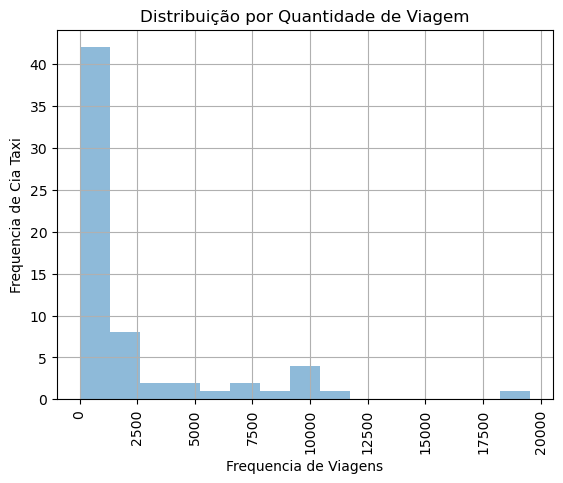

In [7]:
# inserindo gráfico histograma para verificação de frequência da variável
dados01['quantidade_viagens'].hist(bins=15,alpha=0.5);
#-------------------Estilizando Gráfico-----------------------#
plt.xticks(rotation=90);
plt.title('Distribuição por Quantidade de Viagem');
plt.ylabel('Frequencia de Cia Taxi');
plt.xlabel('Frequencia de Viagens');

É evidente que há um grande volume de empresas com uma frequência de quantidade de viagens que varia de 0 a 2500. No entanto, a frequência começa a diminuir a partir de 2500, o que é compreensível, levando em consideração variáveis como a qualidade do serviço e a localidade, que podem influenciar nessa tendência.

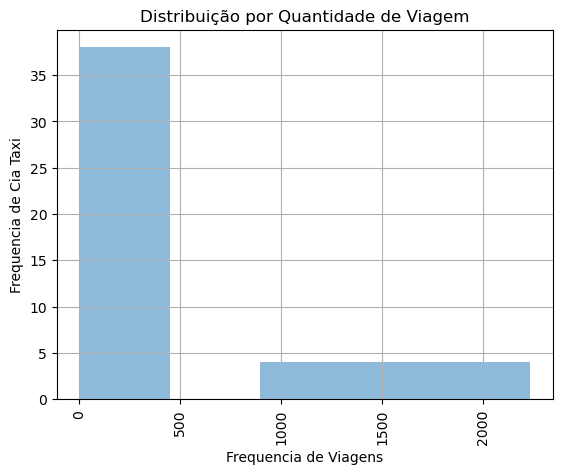

In [8]:
# inserindo gráfico histograma para verificação de frequência da variável
dados01.query('quantidade_viagens > 0 & quantidade_viagens <= 2500').hist(bins=5,alpha=0.5);
#-------------------Estilizando Gráfico-----------------------#
plt.xticks(rotation=90);
plt.title('Distribuição por Quantidade de Viagem');
plt.ylabel('Frequencia de Cia Taxi');
plt.xlabel('Frequencia de Viagens');


Durante a análise dos dados, observamos que existe um grande número de empresas de táxi que registram um volume baixo de viagens, especialmente na faixa de 0 a 500.

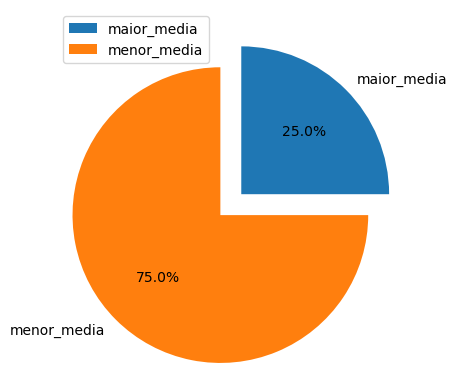

In [9]:
# criação de laço for (loop)
# contagem das linhas com valores maiores que a média da coluna
media_coluna = dados01['quantidade_viagens'].mean()
quantidade_viagens = dados01['quantidade_viagens']

contador = 0
for valor in quantidade_viagens:
    if valor > media_coluna:
        contador += 1
maior_media = contador
        
contador = 0
for valor in quantidade_viagens:
    if valor < media_coluna:
        contador += 1 
menor_media = contador
data = (maior_media,menor_media)
plt.pie(data,autopct="%0.1f%%",labels=('maior_media','menor_media'),explode=(0,0.2))
plt.legend(loc=2)
plt.show()


Ao calcular a média geral e compará-la com a quantidade de viagens acima e abaixo dessa média, constatou-se que a maioria das viagens está abaixo da média, correspondendo a 75% do total, enquanto 25% das viagens ficam acima da média. Essa distribuição de dados é coerente com a visão geral das viagens, uma vez que é compreensível que os dois tipos de viagens tenham perfis e propósitos distintos.

Essa disparidade no percentual de viagens acima e abaixo da média é esperada, uma vez que existem diferentes tipos de viagens com características diversas. Essa análise reforça a compreensão de que as viagens podem ser classificadas em grupos com perfis e funções distintas, o que resulta nessa divisão assimétrica em relação à média.

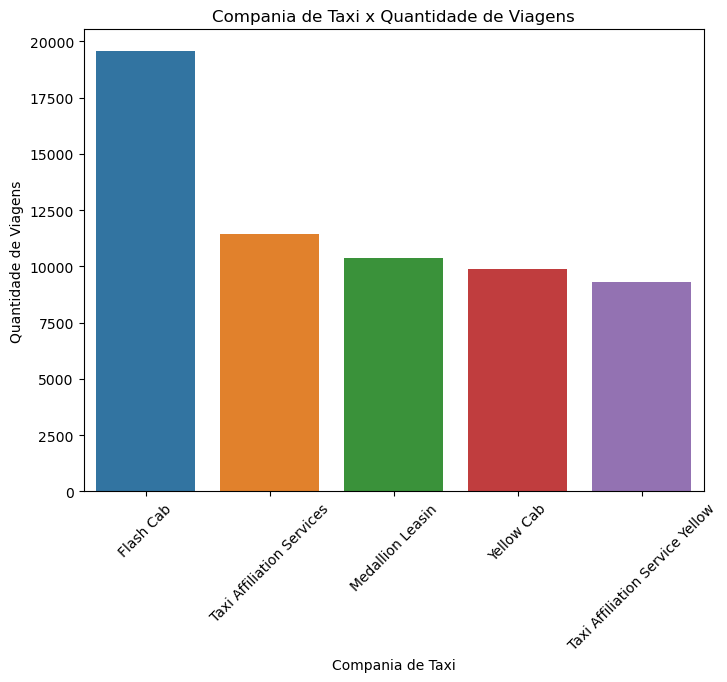

In [10]:
# inserindo gráfico de barras para análise e visibildiade de variáveis categoricas
plt.figure(figsize=(8,6))
sns.barplot(x=dados01['nome_cia_taxi'].head(), y=dados01['quantidade_viagens'].head());
plt.xticks(rotation= 45)
plt.xlabel('Compania de Taxi')
plt.ylabel('Quantidade de Viagens')
plt.title('Compania de Taxi x Quantidade de Viagens');

No gráfico de barras apresentado, é possível observar as cinco empresas de táxi com o maior número de viagens registradas. Dentre elas, destaca-se a Flash Cab, que possui uma vantagem significativa em relação às demais empresas, indicando que é líder na cidade de Chicago.

Através da análise do gráfico de barras, fica evidente que a Flash Cab é a empresa com o maior volume de viagens contabilizadas em comparação às concorrentes. Isso sugere que a Flash Cab desempenha um papel proeminente e é amplamente reconhecida na cidade como uma das principais opções de transporte por táxi.

### Localidade

In [12]:
# leitura das primeiras linhas do dataframe
dados04 = pd.read_csv('data/moved_project_sql_result_04.csv')
dados04.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [13]:
# leitura das informações do dataframe (tipo de dados,campos ausentes,quantidade de dados geral e por campo)
dados04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [14]:
# utilizando a função describe(), para dar visibildiade as principais métricas descritivas
dados04.describe().T.drop("count", axis=1).style.format().background_gradient(subset=['mean', 'std','min','25%','50%','75%','max'], cmap='Accent')

,mean,std,min,25%,50%,75%,max
average_trips,599.953728,1714.591098,1.800000,14.266667,52.016667,298.858333,10727.466667


Ao realizar a leitura da base de dados verificamos a quantidade de dados em cada coluna e não possuem dados ausentes, enquanto ao seu tipo de dados, estão corretos não irão precisar de maiores alterações, dentro da função describe (), temos um desvio padrão alto entre a média relacionada ao tempo de viagens.

### Alteração de Dados

In [15]:
# renomeando colunas do dataframe
dados04.rename(columns = {'dropoff_location_name':'nome_local','average_trips':'media_viagens'}, inplace = True)
dados04

,nome_local,media_viagens
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


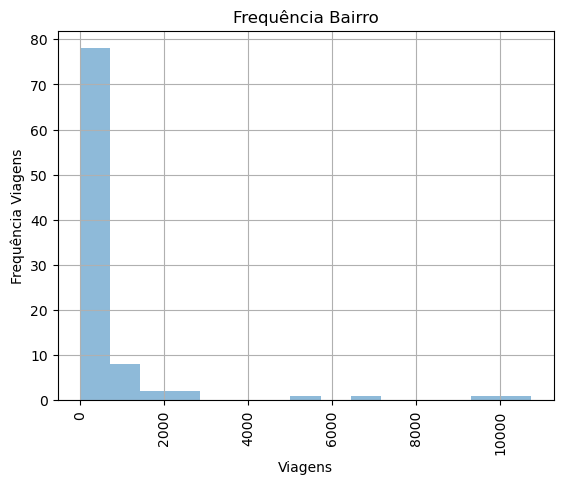

In [45]:
# inserindo gráfico histograma para verificação de frequência da variável
dados04['media_viagens'].hist(bins=15,alpha=0.5);
#-------------------Estilizando Gráfico-----------------------#
plt.xticks(rotation=90);
plt.title('Frequência Bairro');
plt.ylabel('Frequência Viagens');
plt.xlabel('Viagens');

Ao analisar o histograma, podemos identificar a presença de outliers, que são valores extremos, além de observar agrupamentos significativos. Notamos que a maioria dos bairros apresenta uma baixa média de chamadas para utilização de táxi, concentrando-se principalmente próximo ao número zero. No entanto, há um grupo menor de bairros com um volume de viagens que se estende até 10.000.

Essa distribuição indica que alguns bairros específicos concentram o maior número de viagens de táxi. Essa característica pode estar relacionada a fatores como o tamanho da população, uma vez que bairros com maior número de habitantes tendem a gerar mais demanda por serviços de táxi. Portanto, é possível observar a influência direta da característica do bairro, como o número populacional, nesse indicador.

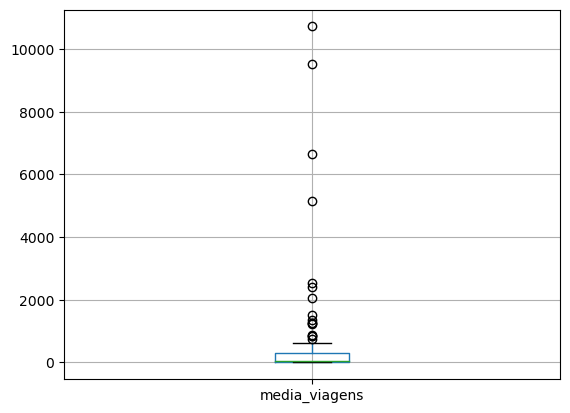

In [17]:
# inserindo gráfico boxplot (diagrama de caixa), verificar as variações
dados04[['media_viagens']].boxplot();

A inclusão do gráfico de diagrama de caixa tem o objetivo de reforçar as características observadas no histograma. É possível deduzir que bairros com maior concentração populacional e/ou características urbanas mais acentuadas apresentam um nicho de negócios mais favorável para empresas de táxi.

Essa relação entre características urbanas e a demanda por serviços de táxi pode ser explicada pelo fato de áreas mais populosas e com maior atividade comercial proporcionarem um ambiente propício para o crescimento de empresas de táxi. Portanto, é plausível concluir que bairros com maior concentração populacional e características urbanas desenvolvidas são mais propensos a oferecer um mercado favorável para empresas desse setor.

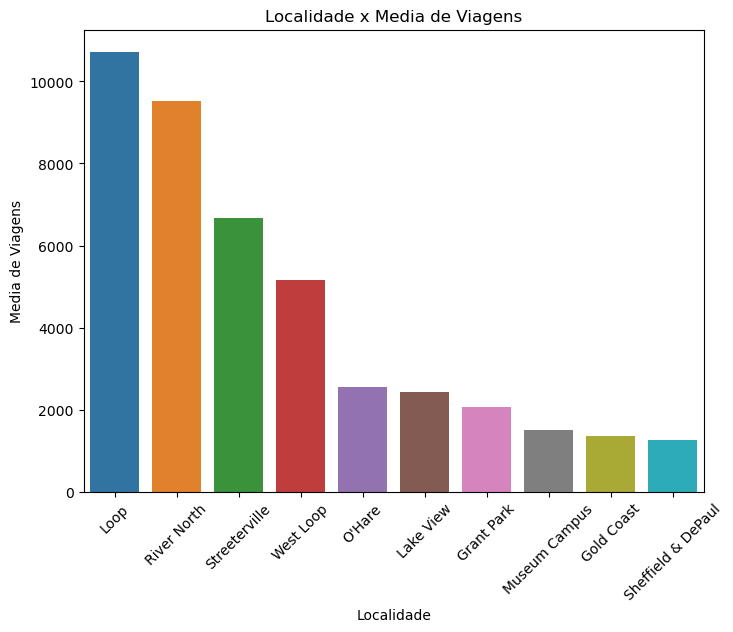

In [18]:
# inserindo gráfico de barras para análise e visibildiade de variáveis categoricas
plt.figure(figsize=(8,6))
sns.barplot(x=dados04['nome_local'].head(10), y=dados04['media_viagens'].head(10));
plt.xticks(rotation= 45)
plt.xlabel('Localidade')
plt.ylabel('Media de Viagens')
plt.title('Localidade x Media de Viagens');

Acima segue as 10 regiões que possuem maior média de número de viagens, para dar embasamento se a quantidade populacional interfere na média, temos a informação que o bairro Loop o primeiro com maior número de viagens, possui 42.298 quantidade de habitantes e Sheffield & DePaul nona cidade, possui 11.841 habitantes. 

Entre o primeiro bairro e o nono bairros temos um percentual de diferença de 27.99%, número significativo de diferença populacional que pode diferir diretamente na utilização de empresas de Taxi.

**Chicago Loop** -->>  Website: -->> https://en.wikipedia.org/wiki/Chicago_Loop

**heffield & DePaul** -->> Website: -->> https://www.niche.com/places-to-live/n/sheffield--and--depaul-chicago-il/

#### Dados Condição Meteorologica e Tempo Viagens

In [19]:
# leitura das primeiras e últimas linhas do dataframe
data07 = pd.read_csv('data/moved_project_sql_result_07.csv')
data07

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [20]:
# leitura das informações do dataframe (tipo de dados,campos ausentes,quantidade de dados geral e por campo)
data07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


### Alterando Dados

In [21]:
# alterando o tipo de dado da variável start_ts para datetime
data07['start_ts']= pd.to_datetime(data07['start_ts'])

In [22]:
# alterando o tipo de dado da coluna duration seconds para inteiro
data07['duration_seconds'] = data07['duration_seconds'].astype(int)

In [23]:
# criação de função para segmentar e criar nova coluna com condições do tempo
def cond_tempo(condicao):  
    if condicao == 'Good':
        return 1
    if condicao == 'Bad':
        return 0

In [24]:
#checando se esta correta a função
cond_tempo('Bad')

0

In [25]:
# Iserindo nova coluna no dataframe
data07['number_condicao_tempo'] = data07['weather_conditions'].apply(cond_tempo)

In [26]:
# criando colunas para segmentar dia / hora
data07['Dia'] = data07['start_ts'].dt.day
data07['Hora'] = data07['start_ts'].dt.hour
data07['Dia_Semana'] = data07['start_ts'].dt.weekday

In [27]:
# criando coluna minutos
minutos = 86400
data07['duration_minutos'] = round((data07['duration_seconds'] / minutos) * 1000 ,2)

In [28]:
# criando coluna horas
minutos = 60
data07['duration_horas'] = round((data07['duration_minutos'] / minutos),2)

In [29]:
#verificando se todas as alterações foram bem sucedidas no dataframe
data07.head(5)

,start_ts,weather_conditions,duration_seconds,number_condicao_tempo,Dia,Hora,Dia_Semana,duration_minutos,duration_horas
0,2017-11-25 16:00:00,Good,2410,1,25,16,5,27.89,0.46
1,2017-11-25 14:00:00,Good,1920,1,25,14,5,22.22,0.37
2,2017-11-25 12:00:00,Good,1543,1,25,12,5,17.86,0.30
3,2017-11-04 10:00:00,Good,2512,1,4,10,5,29.07,0.48
4,2017-11-11 07:00:00,Good,1440,1,11,7,5,16.67,0.28


In [30]:
# checando alterações realizadas para os tipos de dados
data07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   start_ts               1068 non-null   datetime64[ns]
 1   weather_conditions     1068 non-null   object        
 2   duration_seconds       1068 non-null   int32         
 3   number_condicao_tempo  1068 non-null   int64         
 4   Dia                    1068 non-null   int64         
 5   Hora                   1068 non-null   int64         
 6   Dia_Semana             1068 non-null   int64         
 7   duration_minutos       1068 non-null   float64       
 8   duration_horas         1068 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(4), object(1)
memory usage: 71.0+ KB


In [31]:
# utilizando a função describe(), para dar visibildiade as principais métricas descritivas
data07.describe()

,duration_seconds,number_condicao_tempo,Dia,Hora,Dia_Semana,duration_minutos,duration_horas
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.0,1068.000000,1068.000000
mean,2071.731273,0.831461,11.019663,11.414794,5.0,23.978174,0.399513
std,769.461125,0.374520,6.524597,4.098054,0.0,8.905874,0.148515
min,0.000000,0.000000,4.000000,0.000000,5.0,0.000000,0.000000
25%,1438.250000,1.000000,4.000000,8.000000,5.0,16.650000,0.280000
50%,1980.000000,1.000000,11.000000,12.000000,5.0,22.920000,0.380000
75%,2580.000000,1.000000,18.000000,14.000000,5.0,29.860000,0.500000
max,7440.000000,1.000000,25.000000,23.000000,5.0,86.110000,1.440000


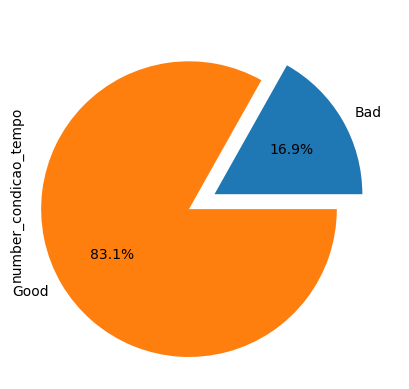

In [32]:
# verificando a proporção de tempo para as datas selecionadas em novembro
data07.groupby('weather_conditions')['number_condicao_tempo'].count().plot(kind='pie',autopct="%0.1f%%",explode=(0,0.2));

Dentro do mês de novembro e exclusivamente aos sábados percebemos que a cidade de Chicago, teve as condições meteorológicas em 83.10% boas e 16.9% ruins.

In [33]:
# realizando agrupamento / agregação de dados usando a função groupby
media_viagens = data07.groupby('Dia')['duration_minutos'].mean().reset_index()
pd.DataFrame(media_viagens).style.format().background_gradient(subset=['duration_minutos'], cmap='BuGn')

,Dia,duration_minutos
0,4,27.550763
1,11,20.620540
2,18,25.846389
3,25,21.693263


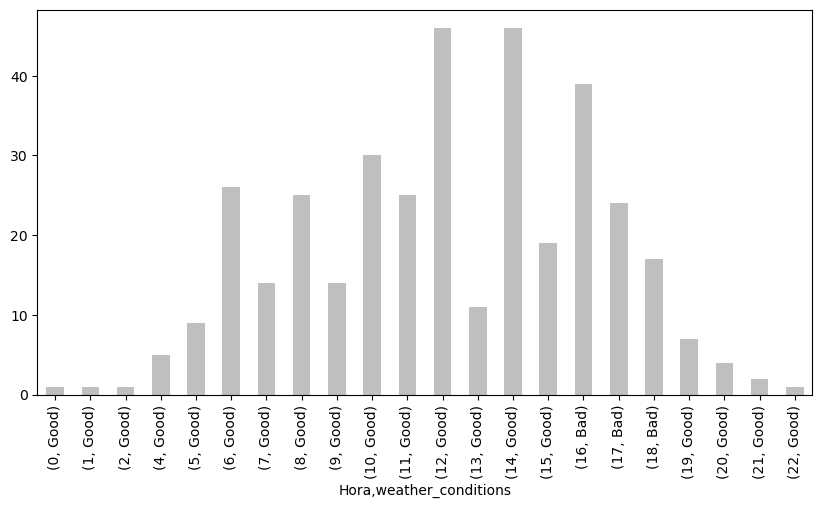

In [34]:
# realizando agrupamento / agregação de dados usando a função groupby
dia04 = data07[data07['Dia']== 4]
dia04.groupby(['Hora','weather_conditions'])['number_condicao_tempo'].count().plot(kind='bar', color='grey', alpha=0.5, figsize=(10, 5));

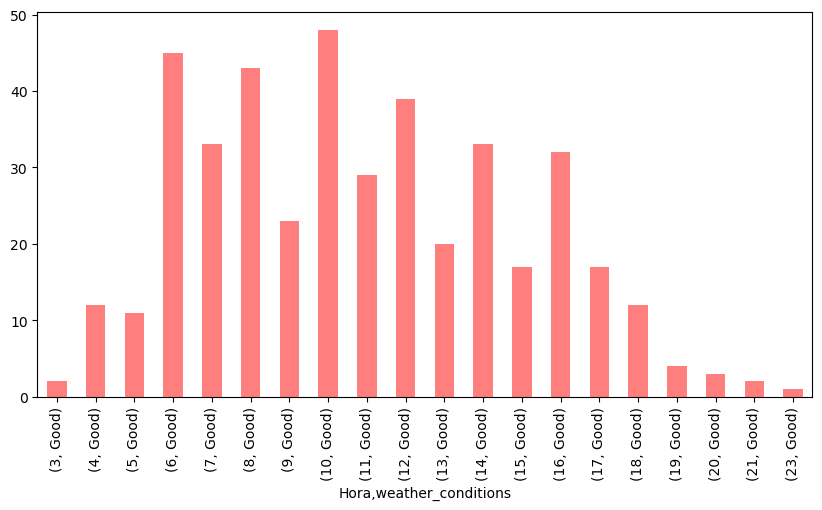

In [35]:
# realizando agrupamento / agregação de dados usando a função groupby
dia07 = data07[data07['Dia']== 11]
dia07.groupby(['Hora','weather_conditions'])['number_condicao_tempo'].count().plot(kind='bar', color='red', alpha=0.5, figsize=(10, 5));

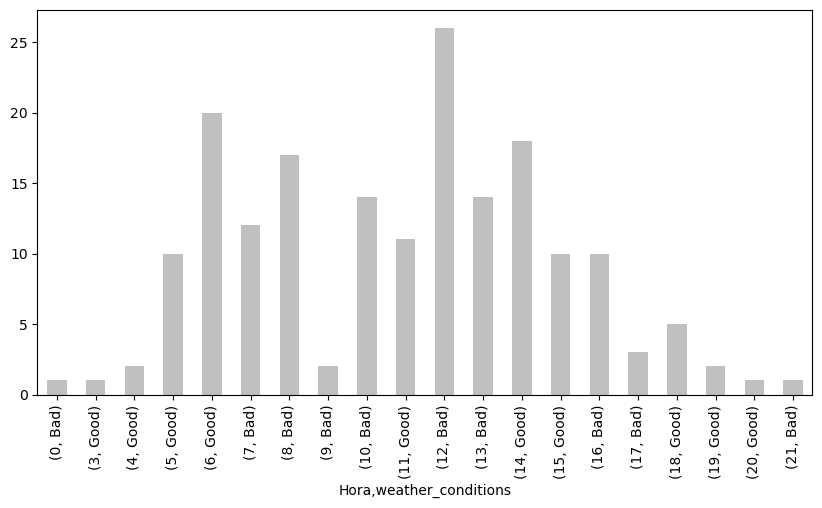

In [36]:
# realizando agrupamento / agregação de dados usando a função groupby
dia18 = data07[data07['Dia']== 18]
dia18.groupby(['Hora','weather_conditions'])['number_condicao_tempo'].count().plot(kind='bar', color='grey', alpha=0.5, figsize=(10, 5));

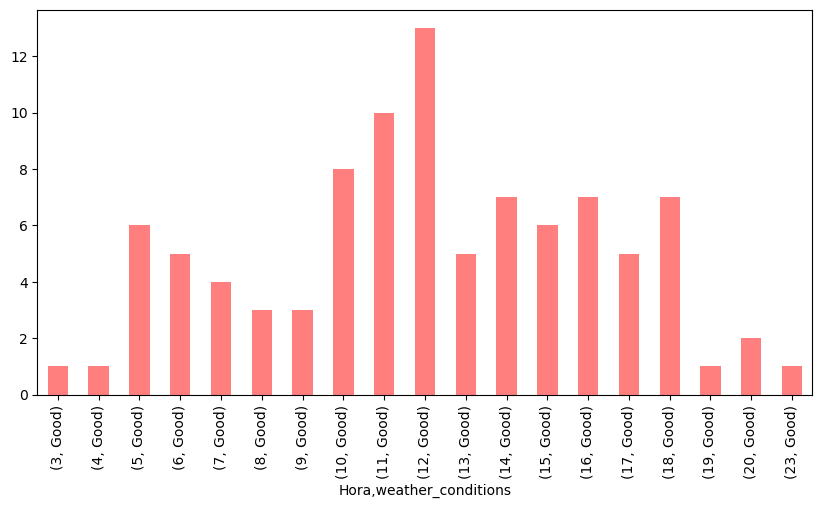

In [37]:
# realizando agrupamento / agregação de dados usando a função groupby
dia25 = data07[data07['Dia']== 25]
dia25.groupby(['Hora','weather_conditions'])['number_condicao_tempo'].count().plot(kind='bar', color='red', alpha=0.5, figsize=(10, 5));

Resumidamente, ao analisar os gráficos de barras que representam as condições climáticas por hora, podemos observar que nos dias 11 e 25, em todos os horários, as condições meteorológicas estavam boas. Isso indica que o clima não interferiu nas viagens realizadas pelos passageiros durante esses dias.

Por outro lado, nos dias 4 e 18, algumas horas foram afetadas por condições climáticas desfavoráveis para viagens de táxi. No entanto, o dia 4 se destaca por apresentar um maior número de horas com condições ruins para a realização das viagens de táxi.

Essas informações destacam a importância de considerar as condições climáticas ao analisar a demanda por serviços de táxi. Dias com condições climáticas adversas podem impactar a demanda e a disponibilidade de táxis, afetando a preferência dos passageiros em utilizar esse meio de transporte.

### Testar Hipótese 

Vamos realizar uma análise das médias de tempo de viagem distribuídas entre os dias 4 e 18 que em todas as localidades de chicago as condições meteorológicas ficaram ruins, os dois dias estão com os dados agrupados e agregados a suas respectivas médias, bem como das médias dados agrupados, entre os dias 11 e 25 com condições de tempo boas.

Construiremos hipóteses e testaremos se essas médias são iguais. 

Considerando que:

- H0 representa a hipótese nula de que as médias entre as duas são iguais.
- H1 é a hipótese alternativa no caso de não serem iguais.

Levaremos em consideração um nível de significância de 0.05 (alpha) e realizaremos os testes utilizando a biblioteca scipy.stats.ttest_ind e scipy.stats.levene

In [38]:
a  = data07.query('Dia == 4')
b  = data07.query('Dia == 18')
df_Bad_Day = [a,b]
df_Bad_Day = pd.concat(df_Bad_Day)
df_Bad_Day['duration_minutos'].mean()
print('A média de tempo em viagens na condição do tempo bom foi de:',round(df_Bad_Day['duration_minutos'].mean(),2),'minutos')
#-----------------------#----------------------#-------------------#
c  = data07.query('Dia == 11')
d  = data07.query('Dia == 25')
df_Good_Day = [c,d]
df_Good_Day = pd.concat(df_Good_Day)
df_Good_Day['duration_minutos'].mean()
print('A média de tempo em viagens na condição do tempo bom foi de:',round(df_Good_Day['duration_minutos'].mean(),2),'minutos')

A média de tempo em viagens na condição do tempo bom foi de: 26.99 minutos
A média de tempo em viagens na condição do tempo bom foi de: 20.82 minutos


In [39]:
# realizando teste de hipótese
sample_1 = df_Bad_Day['number_condicao_tempo'][df_Bad_Day['number_condicao_tempo'].notna()].tolist()
sample_2 = df_Good_Day['number_condicao_tempo'][df_Good_Day['number_condicao_tempo'].notna()].tolist()
alpha = 0.05
stat, p_value = st.levene(sample_1, sample_2)
result_levene = p_value

if result_levene < alpha:
    print('Rejeitamos H0, variâncias são diferentes, equal_var = Falso para o teste')
else:
    print('Não rejeitamos H0, variancias não são diferentes, equal_var = Verdadeiro para o teste')

var_sample = [np.var(x, ddof=1) for x in [sample_1, sample_2]]


print('Amostra de variâncias:', var_sample)

Rejeitamos H0, variâncias são diferentes, equal_var = Falso para o teste
Amostra de variâncias: [0.22118649175321933, 0.0]


In [40]:
alpha = 0.05  # nível crítico de significância estatística

results = st.ttest_ind(
    df_Bad_Day['number_condicao_tempo'], df_Good_Day['number_condicao_tempo'], equal_var=False
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

p-value: 2.8588845149915184e-49
Nós rejeitamos a hipótese nula


Ao realizar o teste de Levene nas duas amostras das avaliações tempo de viagem para os sabados tempo ruim e sabados tempo bom, rejeitamos a hipótese nula, pois as variâncias são diferentes. No entanto, ao examinarmos as médias, rejeitamos a hipótese nula, o que indica que, para esse teste, as amostras possuem médias diferentes. Além disso, ao observarmos os valores relacionados às médias, percebemos que elas são, de fato, diferentes.

## Conclusão Geral

Nossa conclusão, com base no estudo de caso analisando fatores como as condições meteorológicas aos sábados, é que o clima tem um impacto direto na demanda dos passageiros por serviços de táxi. Verificamos que, nos dias em que as condições climáticas são ruins, as médias de viagens são maiores em comparação aos dias com clima bom. No entanto, percebemos que essa variação quantitativa no número de viagens não está relacionada às questões meteorológicas.

Isso significa que, mesmo quando o tempo está ruim, não há uma redução significativa no número de viagens que deixam de ser realizadas devido a essa condição. Apenas a variação no tempo é afetada, mas a quantidade de viagens em si não é influenciada pelas condições meteorológicas.

Essa constatação indica que outros fatores, como a necessidade de deslocamento dos passageiros ou a disponibilidade de transporte alternativo, podem ter um peso maior na decisão de utilizar o serviço de táxi do que as condições climáticas em si.